In [4]:
import math
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
%matplotlib inline

# Reading data

In [5]:
train_df = pd.read_csv('data/TrainData2.csv', delimiter = ',').dropna().reset_index(drop=True)
train_df['TIMESTAMP'] = pd.to_datetime(train_df['TIMESTAMP'], format='%Y%m%d %H:%M')
train_df = train_df.set_index('TIMESTAMP')
std_dev = 3
train_df = train_df[(np.abs(stats.zscore(train_df)) < float(std_dev)).all(axis=1)]

In [6]:
pred_df = pd.read_csv('data/WeatherForecastInput2.csv', delimiter = ',')
pred_df['TIMESTAMP'] = pd.to_datetime(pred_df['TIMESTAMP'], format='%Y%m%d %H:%M')
pred_df = pred_df.set_index('TIMESTAMP')

# Model 1

In [ ]:
X_train = train_df[['U10', 'V10', 'U100', 'V100']].copy()
y_train = train_df[['POWER']].copy()

X_est = pred_df[['U10', 'V10', 'U100', 'V100']].copy()

polynomial_features = PolynomialFeatures(degree=3)

X_train = pd.DataFrame(polynomial_features.fit_transform(X_train))
X_est = pd.DataFrame(polynomial_features.fit_transform(X_est))

model = LinearRegression()
scores =[]

kfold = KFold(n_splits=2, shuffle=True, random_state=42)

for i, (train, test) in enumerate(kfold.split(X_train, y_train)):
    model.fit(X_train.iloc[train,:], y_train.iloc[train,:])
    y_est = model.predict(X_train.iloc[test,:])
    error = (y_est - y_train.iloc[test,:])**2
    RMSE = math.sqrt(error.sum())/len(y_est)
    scores.append(RMSE)
print(scores)

# Model 2

In [ ]:
X_train = pd.DataFrame()
X_train['W10'] = np.sqrt(train_df['U10']**2 + train_df['V10']**2)
X_train['W100'] = np.sqrt(train_df['U100']**2 + train_df['V100']**2)

y_train = train_df[['POWER']].copy()

X_est = pd.DataFrame()
X_est['W10'] = np.sqrt(pred_df['U10']**2 + pred_df['V10']**2)
X_est['W100'] = np.sqrt(pred_df['U100']**2 + pred_df['V100']**2)

polynomial_features = PolynomialFeatures(degree=3)

X_train = pd.DataFrame(polynomial_features.fit_transform(X_train))
X_est = pd.DataFrame(polynomial_features.fit_transform(X_est))

model = LinearRegression()
scores =[]

kfold = KFold(n_splits=2, shuffle=True, random_state=42)

for i, (train, test) in enumerate(kfold.split(X_train, y_train)):
    model.fit(X_train.iloc[train,:], y_train.iloc[train,:])
    y_est = model.predict(X_train.iloc[test,:])
    error = (y_est - y_train.iloc[test,:])**2
    RMSE = math.sqrt(error.sum())/len(y_est)
    scores.append(RMSE)
print(scores)

In [ ]:
stage1 = pd.DataFrame(model2.predict(X_est2)).to_csv('stage1.csv', index = False)

# Model 3

In [ ]:
X_train3 = train_df
X_train3['beta_0'] = 1
X_train3 = X_train3.drop(columns=['U10', 'V10', 'U100', 'V100', 'POWER'])
X_train3['W10'] = np.sqrt(train_df['U10']**2 + train_df['V10']**2)
X_train3['W100'] = np.sqrt(train_df['U100']**2 + train_df['V100']**2)
X_train3['W10^3'] = X_train3['W10']**3
X_train3['W100^3'] = X_train3['W100']**3

y_train3 = train_df[['POWER']].copy()

X_est3 = pd.DataFrame()
X_est3['W10'] = np.sqrt(train_df['U10']**2 + train_df['V10']**2)
X_est3['W100'] = np.sqrt(train_df['U100']**2 + train_df['V100']**2)
X_est3['W10^3'] = X_est3['W10']**3
X_est3['W100^3'] = X_est3['W100']**3

model3 = LinearRegression()
model3.fit(X_train3,y_train3)

y_est3 = model3.predict(X_train3)
error3 = (y_est3 - y_train3)**2
RMSE3 = math.sqrt(error3.sum())/len(y_est3)
RMSE3

# Model 5

In [ ]:
X_train2 = pd.DataFrame()

X_train2['W10'] = np.sqrt(train_df['U10']**2 + train_df['V10']**2)
X_train2['W100'] = np.sqrt(train_df['U100']**2 + train_df['V100']**2)

y_train2 = train_df[['POWER']].copy()

X_est2 = pd.DataFrame()
X_est2['W10'] = np.sqrt(train_df['U10']**2 + train_df['V10']**2)
X_est2['W100'] = np.sqrt(train_df['U100']**2 + train_df['V100']**2)

polynomial_features = PolynomialFeatures(degree=3)

X_train2 = pd.DataFrame(polynomial_features.fit_transform(X_train2))
X_est2 = pd.DataFrame(polynomial_features.fit_transform(X_est2))

X_train2['HOUR'] = train_df.index.hour 
X_est2['HOUR'] = train_df.index.hour

model2 = LinearRegression()
model2.fit(X_train2,y_train2)

y_est2 = model2.predict(X_train2)
error2 = (y_est2 - y_train2)**2
RMSE2 = math.sqrt(error2.sum())/len(y_est2)
RMSE2

# Model 6

In [ ]:
X_train = pd.DataFrame()
X_train['W10'] = np.sqrt(train_df['U10']**2 + train_df['V10']**2)
X_train['W100'] = np.sqrt(train_df['U100']**2 + train_df['V100']**2)
X_train['W10^3'] = X_train['W10']**3
X_train['W100^3'] = X_train['W100']**3
X_train['beta_0'] = 1

y_train = train_df[['POWER']].copy()

X_pred = pd.DataFrame()
X_pred['W10'] = np.sqrt(pred_df['U10']**2 + pred_df['V10']**2)
X_pred['W100'] = np.sqrt(pred_df['U100']**2 + pred_df['V100']**2)
X_pred['W10^3'] = X_pred['W10']**3
X_pred['W100^3'] = X_pred['W100']**3
X_pred['beta_0'] = 1

model = LinearRegression()
scores =[]

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

for i, (train, test) in enumerate(kfold.split(X_train, y_train)):
    model.fit(X_train.iloc[train,:], y_train.iloc[train,:])
    y_est = model.predict(X_train.iloc[test,:])
    RMSE = mean_squared_error(y_train.iloc[test,:], y_est)
    scores.append(RMSE)
print(scores)

In [ ]:
X_train = pd.DataFrame()
X_train['W10'] = np.sqrt(train_df['U10']**2 + train_df['V10']**2)
X_train['W100'] = np.sqrt(train_df['U100']**2 + train_df['V100']**2)
X_train['W10^3'] = X_train['W10']**3
X_train['W100^3'] = X_train['W100']**3
X_train['beta_0'] = 1
X_train['hour'] = X_train.index.hour

y_train = train_df[['POWER']].copy()

X_pred = pd.DataFrame()
X_pred['W10'] = np.sqrt(pred_df['U10']**2 + pred_df['V10']**2)
X_pred['W100'] = np.sqrt(pred_df['U100']**2 + pred_df['V100']**2)
X_pred['W10^3'] = X_pred['W10']**3
X_pred['W100^3'] = X_pred['W100']**3
X_pred['beta_0'] = 1
X_pred['hour'] = X_pred.index.hour

model = LinearRegression()
scores =[]

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

for i, (train, test) in enumerate(kfold.split(X_train, y_train)):
    model.fit(X_train.iloc[train,:], y_train.iloc[train,:])
    y_est = model.predict(X_train.iloc[test,:])
    RMSE = mean_squared_error(y_train.iloc[test,:], y_est)
    scores.append(RMSE)
print(scores)

In [ ]:
X_train = pd.DataFrame()
X_train['W10'] = np.sqrt(train_df['U10']**2 + train_df['V10']**2)
X_train['W100'] = np.sqrt(train_df['U100']**2 + train_df['V100']**2)
X_train['W10^3'] = X_train['W10']**3
X_train['W100^3'] = X_train['W100']**3
X_train['beta_0'] = 1
X_train['hour'] = X_train.index.hour
X_train['year'] = X_train.index.year

y_train = train_df[['POWER']].copy()

X_pred = pd.DataFrame()
X_pred['W10'] = np.sqrt(pred_df['U10']**2 + pred_df['V10']**2)
X_pred['W100'] = np.sqrt(pred_df['U100']**2 + pred_df['V100']**2)
X_pred['W10^3'] = X_pred['W10']**3
X_pred['W100^3'] = X_pred['W100']**3
X_pred['beta_0'] = 1
X_pred['hour'] = X_pred.index.hour
X_pred['year'] = X_pred.index.year

model = LinearRegression()
scores =[]

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

for i, (train, test) in enumerate(kfold.split(X_train, y_train)):
    model.fit(X_train.iloc[train,:], y_train.iloc[train,:])
    y_est = model.predict(X_train.iloc[test,:])
    RMSE = mean_squared_error(y_train.iloc[test,:], y_est)
    scores.append(RMSE)
print(scores)
print(np.mean(scores))

In [ ]:
X_train = pd.DataFrame()
X_train['W10'] = np.sqrt(train_df['U10']**2 + train_df['V10']**2)
X_train['W100'] = np.sqrt(train_df['U100']**2 + train_df['V100']**2)
X_train['W10^2'] = X_train['W10']**2
X_train['W100^2'] = X_train['W100']**2
X_train['W10^3'] = X_train['W10']**3
X_train['W100^3'] = X_train['W100']**3
X_train['beta_0'] = 1
X_train['hour'] = X_train.index.hour
X_train['year'] = X_train.index.year

y_train = train_df[['POWER']].copy()

X_pred = pd.DataFrame()
X_pred['W10'] = np.sqrt(pred_df['U10']**2 + pred_df['V10']**2)
X_pred['W100'] = np.sqrt(pred_df['U100']**2 + pred_df['V100']**2)
X_pred['W10^2'] = X_pred['W10']**2
X_pred['W100^2'] = X_pred['W100']**2
X_pred['W10^3'] = X_pred['W10']**3
X_pred['W100^3'] = X_pred['W100']**3
X_pred['beta_0'] = 1
X_pred['hour'] = X_pred.index.hour
X_pred['year'] = X_pred.index.year

model = LinearRegression()
scores =[]

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

for i, (train, test) in enumerate(kfold.split(X_train, y_train)):
    model.fit(X_train.iloc[train,:], y_train.iloc[train,:])
    y_est = model.predict(X_train.iloc[test,:])
    RMSE = mean_squared_error(y_train.iloc[test,:], y_est)
    scores.append(RMSE)
print(scores)
print(np.mean(scores))

In [ ]:
X_train = pd.DataFrame()
X_train['U10'] = train_df['U10']
X_train['U100'] = train_df['U100']
X_train['V10'] = train_df['V10']
X_train['V100'] = train_df['V100']
X_train['W10'] = np.sqrt(train_df['U10']**2 + train_df['V10']**2)
X_train['W100'] = np.sqrt(train_df['U100']**2 + train_df['V100']**2)
X_train['W10^2'] = X_train['W10']**2
X_train['W100^2'] = X_train['W100']**2
X_train['W10^3'] = X_train['W10']**3
X_train['W100^3'] = X_train['W100']**3
X_train['beta_0'] = 1
X_train['hour'] = X_train.index.hour
X_train['year'] = X_train.index.year

y_train = train_df[['POWER']].copy()

X_pred = pd.DataFrame()
X_pred['U10'] = pred_df['U10']
X_pred['U100'] = pred_df['U100']
X_pred['V10'] = pred_df['V10']
X_pred['V100'] = pred_df['V100']
X_pred['W10'] = np.sqrt(pred_df['U10']**2 + pred_df['V10']**2)
X_pred['W100'] = np.sqrt(pred_df['U100']**2 + pred_df['V100']**2)
X_pred['W10^2'] = X_pred['W10']**2
X_pred['W100^2'] = X_pred['W100']**2
X_pred['W10^3'] = X_pred['W10']**3
X_pred['W100^3'] = X_pred['W100']**3
X_pred['beta_0'] = 1
X_pred['hour'] = X_pred.index.hour
X_pred['year'] = X_pred.index.year

model = LinearRegression()
scores =[]

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

for i, (train, test) in enumerate(kfold.split(X_train, y_train)):
    model.fit(X_train.iloc[train,:], y_train.iloc[train,:])
    y_est = model.predict(X_train.iloc[test,:])
    RMSE = mean_squared_error(y_train.iloc[test,:], y_est)
    scores.append(RMSE)
print(scores)
print(np.mean(scores))

In [11]:
X_train = pd.DataFrame()
X_train['U10'] = train_df['U10']
X_train['U100'] = train_df['U100']
X_train['V10'] = train_df['V10']
X_train['V100'] = train_df['V100']
X_train['U10^2'] = X_train['U10']**2
X_train['U100^2'] = X_train['U100']**2
X_train['V10^3'] = X_train['V10']**3
X_train['V100^3'] = X_train['V100']**3

X_train['W10'] = np.sqrt(train_df['U10']**2 + train_df['V10']**2)
X_train['W100'] = np.sqrt(train_df['U100']**2 + train_df['V100']**2)
X_train['W10^2'] = X_train['W10']**2
X_train['W100^2'] = X_train['W100']**2
X_train['W10^3'] = X_train['W10']**3
X_train['W100^3'] = X_train['W100']**3
X_train['beta_0'] = 1
X_train['hour'] = X_train.index.hour
X_train['year'] = X_train.index.year

y_train = train_df[['POWER']].copy()

X_pred = pd.DataFrame()

X_pred['U10'] = pred_df['U10']
X_pred['U100'] = pred_df['U100']
X_pred['V10'] = pred_df['V10']
X_pred['V100'] = pred_df['V100']
X_pred['U10^2'] = X_pred['U10']**2
X_pred['U100^2'] = X_pred['U100']**2
X_pred['V10^3'] = X_pred['V10']**3
X_pred['V100^3'] = X_pred['V100']**3

X_pred['W10'] = np.sqrt(pred_df['U10']**2 + pred_df['V10']**2)
X_pred['W100'] = np.sqrt(pred_df['U100']**2 + pred_df['V100']**2)
X_pred['W10^2'] = X_pred['W10']**2
X_pred['W100^2'] = X_pred['W100']**2
X_pred['W10^3'] = X_pred['W10']**3
X_pred['W100^3'] = X_pred['W100']**3

X_pred['beta_0'] = 1

X_pred['hour'] = X_pred.index.hour
X_pred['year'] = X_pred.index.year

model = LinearRegression()
scores = []

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

for i, (train, test) in enumerate(kfold.split(X_train, y_train)):
    model.fit(X_train.iloc[train,:], y_train.iloc[train,:])
    y_est = model.predict(X_train.iloc[test,:])
    RMSE = mean_squared_error(y_train.iloc[test,:], y_est)
    scores.append(RMSE)
print(scores)
print(np.mean(scores))

[0.01653745868141711, 0.01702478424177884, 0.01683979052719368, 0.01863879947053853, 0.017982386259269175, 0.017424827214917147, 0.017763324209702315, 0.01657757677241125, 0.017778321191418534, 0.017239924277617072]
0.017380719284626367


In [35]:
X_train = pd.DataFrame()
X_train['U10'] = train_df['U10']
X_train['U100'] = train_df['U100']
X_train['V10'] = train_df['V10']
X_train['V100'] = train_df['V100']
X_train['U10^2'] = X_train['U10']**2
X_train['U100^2'] = X_train['U100']**2
X_train['V10^3'] = X_train['V10']**3
X_train['V100^3'] = X_train['V100']**3

X_train['W10'] = np.sqrt(train_df['U10']**2 + train_df['V10']**2)
X_train['W100'] = np.sqrt(train_df['U100']**2 + train_df['V100']**2)
X_train['W10^2'] = X_train['W10']**2
X_train['W100^2'] = X_train['W100']**2
X_train['W10^3'] = X_train['W10']**3
X_train['W100^3'] = X_train['W100']**3
X_train['beta_0'] = 1
X_train['hour'] = X_train.index.hour
X_train['year'] = X_train.index.year

y_train = train_df[['POWER']].copy()

X_pred = pd.DataFrame()

X_pred['U10'] = pred_df['U10']
X_pred['U100'] = pred_df['U100']
X_pred['V10'] = pred_df['V10']
X_pred['V100'] = pred_df['V100']
X_pred['U10^2'] = X_pred['U10']**2
X_pred['U100^2'] = X_pred['U100']**2
X_pred['V10^3'] = X_pred['V10']**3
X_pred['V100^3'] = X_pred['V100']**3

X_pred['W10'] = np.sqrt(pred_df['U10']**2 + pred_df['V10']**2)
X_pred['W100'] = np.sqrt(pred_df['U100']**2 + pred_df['V100']**2)
X_pred['W10^2'] = X_pred['W10']**2
X_pred['W100^2'] = X_pred['W100']**2
X_pred['W10^3'] = X_pred['W10']**3
X_pred['W100^3'] = X_pred['W100']**3

X_pred['beta_0'] = 1

X_pred['hour'] = X_pred.index.hour
X_pred['year'] = X_pred.index.year

model = LinearRegression()
scores = []

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

for i, (train, test) in enumerate(kfold.split(X_train, y_train)):
    model.fit(X_train.iloc[train,:], y_train.iloc[train,:])
    y_est = model.predict(X_train.iloc[test,:])
    RMSE = mean_squared_error(y_train.iloc[test,:], y_est)
    scores.append(RMSE)
print(scores)
print(np.mean(scores))

[0.01653745868141711, 0.01702478424177884, 0.01683979052719368, 0.01863879947053853, 0.017982386259269175, 0.017424827214917147, 0.017763324209702315, 0.01657757677241125, 0.017778321191418534, 0.017239924277617072]
0.017380719284626367


In [53]:
X_train = pd.DataFrame()
X_train['U10'] = train_df['U10']
X_train['U100'] = train_df['U100']
X_train['V10'] = train_df['V10']
X_train['V100'] = train_df['V100']
X_train['U10^2'] = X_train['U10']**2
X_train['U100^2'] = X_train['U100']**2
X_train['V10^3'] = X_train['V10']**3
X_train['V100^3'] = X_train['V100']**3

X_train['W10'] = np.sqrt(train_df['U10']**2 + train_df['V10']**2)
X_train['W100'] = np.sqrt(train_df['U100']**2 + train_df['V100']**2)
X_train['W10^2'] = X_train['W10']**2
X_train['W100^2'] = X_train['W100']**2
X_train['W10^3'] = X_train['W10']**3
X_train['W100^3'] = X_train['W100']**3
X_train['beta_0'] = 1
X_train['hour'] = X_train.index.hour
X_train['year'] = X_train.index.year

daily_summary = pd.DataFrame()
daily_summary['Day_before'] = train_df['POWER'].resample('D').mean()
daily_summary['date'] = daily_summary.index.date
X_train['date'] = X_train.index.date
X_train = X_train.merge(daily_summary, how='left').drop(columns='date')
X_train.drop(X_train.tail(1).index,inplace=True)

y_train = train_df[['POWER']].copy()
y_train.drop(y_train.tail(1).index,inplace=True)

X_pred = pd.DataFrame()

X_pred['U10'] = pred_df['U10']
X_pred['U100'] = pred_df['U100']
X_pred['V10'] = pred_df['V10']
X_pred['V100'] = pred_df['V100']
X_pred['U10^2'] = X_pred['U10']**2
X_pred['U100^2'] = X_pred['U100']**2
X_pred['V10^3'] = X_pred['V10']**3
X_pred['V100^3'] = X_pred['V100']**3

X_pred['W10'] = np.sqrt(pred_df['U10']**2 + pred_df['V10']**2)
X_pred['W100'] = np.sqrt(pred_df['U100']**2 + pred_df['V100']**2)
X_pred['W10^2'] = X_pred['W10']**2
X_pred['W100^2'] = X_pred['W100']**2
X_pred['W10^3'] = X_pred['W10']**3
X_pred['W100^3'] = X_pred['W100']**3

X_pred['beta_0'] = 1

X_pred['hour'] = X_pred.index.hour
X_pred['year'] = X_pred.index.year

In [54]:
model = LinearRegression()
scores = []

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

for i, (train, test) in enumerate(kfold.split(X_train, y_train)):
    model.fit(X_train.iloc[train,:], y_train.iloc[train,:])
    y_est = model.predict(X_train.iloc[test,:])
    RMSE = mean_squared_error(y_train.iloc[test,:], y_est)
    scores.append(RMSE)
print(scores)
print(np.mean(scores))

[0.015294997217419318, 0.014557895601369171, 0.0139538942181895, 0.015226633161371296, 0.015156802120902096, 0.014310178227507677, 0.015010975840043645, 0.013989371923266136, 0.014791996337288721, 0.014219601740342707]
0.014651234638770026


In [113]:
X_train = pd.DataFrame()
X_train['U10'] = train_df['U10']
X_train['U100'] = train_df['U100']
X_train['V10'] = train_df['V10']
X_train['V100'] = train_df['V100']
X_train['U10^2'] = X_train['U10']**2
X_train['U100^2'] = X_train['U100']**2
X_train['V10^3'] = X_train['V10']**3
X_train['V100^3'] = X_train['V100']**3

X_train['W10'] = np.sqrt(train_df['U10']**2 + train_df['V10']**2)
X_train['W100'] = np.sqrt(train_df['U100']**2 + train_df['V100']**2)
X_train['W10^2'] = X_train['W10']**2
X_train['W100^2'] = X_train['W100']**2
X_train['W10^3'] = X_train['W10']**3
X_train['W100^3'] = X_train['W100']**3
X_train['beta_0'] = 1
X_train['hour'] = X_train.index.hour
#X_train['year'] = X_train.index.year
#X_train['month'] = X_train.index.month

y_train = train_df[['POWER']].copy()

X_pred = pd.DataFrame()

X_pred['U10'] = pred_df['U10']
X_pred['U100'] = pred_df['U100']
X_pred['V10'] = pred_df['V10']
X_pred['V100'] = pred_df['V100']
X_pred['U10^2'] = X_pred['U10']**2
X_pred['U100^2'] = X_pred['U100']**2
X_pred['V10^3'] = X_pred['V10']**3
X_pred['V100^3'] = X_pred['V100']**3

X_pred['W10'] = np.sqrt(pred_df['U10']**2 + pred_df['V10']**2)
X_pred['W100'] = np.sqrt(pred_df['U100']**2 + pred_df['V100']**2)
X_pred['W10^2'] = X_pred['W10']**2
X_pred['W100^2'] = X_pred['W100']**2
X_pred['W10^3'] = X_pred['W10']**3
X_pred['W100^3'] = X_pred['W100']**3

X_pred['beta_0'] = 1

X_pred['hour'] = X_pred.index.hour
#X_pred['year'] = X_pred.index.year
#X_pred['month'] = X_pred.index.month

model = LinearRegression()
scores = []

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

for i, (train, test) in enumerate(kfold.split(X_train, y_train)):
    model.fit(X_train.iloc[train,:], y_train.iloc[train,:])
    y_est = model.predict(X_train.iloc[test,:])
    RMSE = mean_squared_error(y_train.iloc[test,:], y_est)
    scores.append(RMSE)
print(scores)
print(np.mean(scores))

[0.017751003600920228, 0.018266534113116288, 0.01818054395166276, 0.020131006585204513, 0.019276084322631202, 0.01869096104984057, 0.019291298411673655, 0.018020813194392745, 0.019238178448136474, 0.01876685479359436]
0.01876132784711728


# Making predictions with last model:

In [110]:
model = LinearRegression()
model.fit(X_train, y_train)
y_est = model.predict(X_pred).clip(min=0, max=1)

In [111]:
np.savetxt("stage2_complete.csv", y_est, delimiter=",")

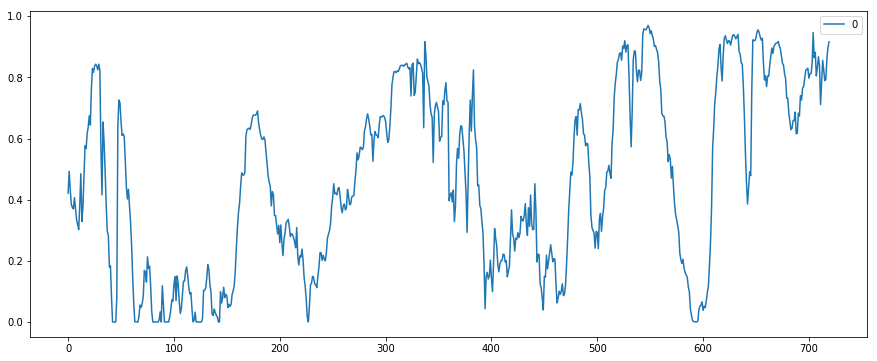

In [112]:
pd.DataFrame(y_est).plot(figsize=(15,6))

In [108]:
y_est

array([[4.21576337e-01],
       [4.92833915e-01],
       [4.33785997e-01],
       [3.85106222e-01],
       [3.75410560e-01],
       [3.69888415e-01],
       [4.06823540e-01],
       [3.71221593e-01],
       [3.34038474e-01],
       [3.19321117e-01],
       [3.02225973e-01],
       [3.81577023e-01],
       [4.85106798e-01],
       [3.28695342e-01],
       [3.77494389e-01],
       [4.72296542e-01],
       [5.76429681e-01],
       [5.67638350e-01],
       [6.15898718e-01],
       [6.38734113e-01],
       [6.74736693e-01],
       [6.44271086e-01],
       [7.64449743e-01],
       [8.29425997e-01],
       [8.16978589e-01],
       [8.37147084e-01],
       [8.43518106e-01],
       [8.38455895e-01],
       [8.24910945e-01],
       [8.43597825e-01],
       [8.23570876e-01],
       [5.68491992e-01],
       [4.15714102e-01],
       [6.54483939e-01],
       [5.86342969e-01],
       [4.91349729e-01],
       [3.79625084e-01],
       [2.97547927e-01],
       [2.82720123e-01],
       [1.79211982e-01],


In [114]:
X_train

,U10,U100,V10,V100,U10^2,U100^2,V10^3,V100^3,W10,W100,W10^2,W100^2,W10^3,W100^3,beta_0,hour
TIMESTAMP,,,,,,,,,,,,,,,,
2015-01-01 03:00:00,5.99531,9.52143,4.893340,6.990940,35.943742,90.657629,117.169932,341.669903,7.738767,11.812319,59.888518,139.530871,463.463304,1648.183110,1,3
2015-01-01 06:00:00,6.17865,9.73491,5.702770,8.097310,38.175716,94.768473,185.463123,530.911703,8.408169,12.662342,70.697301,160.334902,594.434840,2030.215344,1,6
2015-01-01 09:00:00,7.39201,11.21580,5.660100,8.107290,54.641812,125.794170,181.331107,532.877182,9.310131,13.839159,86.678544,191.522321,806.988620,2650.507842,1,9
2015-01-01 12:00:00,7.83819,12.56750,5.516780,8.258530,61.437222,157.942056,167.902436,563.259146,9.584993,15.038131,91.872084,226.145374,880.593250,3400.803685,1,12
2015-01-01 15:00:00,7.37616,11.32480,7.398680,10.652400,54.407736,128.251095,405.007189,1208.766451,10.447402,15.547499,109.148202,241.724721,1140.315111,3758.214821,1,15
2015-01-01 18:00:00,7.91396,12.18190,8.464560,12.172500,62.630763,148.398688,606.475363,1803.596358,11.587905,17.221163,134.279539,296.568444,1556.018520,5107.253416,1,18
2015-01-01 21:00:00,8.79267,13.52780,8.913670,12.889500,77.311046,183.001373,708.222394,2141.451351,12.520565,18.685304,156.764559,349.140583,1962.780912,6523.797911,1,21
2015-01-02 00:00:00,10.41890,15.94720,9.085220,13.080200,108.553477,254.313188,749.905165,2237.912765,13.823701,20.625344,191.094700,425.404820,2641.635924,8774.120798,1,0
2015-01-02 03:00:00,12.66110,19.19230,6.914240,9.781990,160.303453,368.344379,330.547100,936.012489,14.426024,21.541395,208.110168,464.031708,3002.202275,9995.890405,1,3


In [113]:
X = pd.DataFrame()
X['U10'] = train_df['U10']
X['U100'] = train_df['U100']
X['V10'] = train_df['V10']
X['V100'] = train_df['V100']
X['U10^2'] = X['U10']**2
X['U100^2'] = X['U100']**2
X['V10^3'] = X['V10']**3
X['V100^3'] = X['V100']**3

X['W10'] = np.sqrt(train_df['U10']**2 + train_df['V10']**2)
X['W100'] = np.sqrt(train_df['U100']**2 + train_df['V100']**2)
X['W10^2'] = X['W10']**2
X['W100^2'] = X['W100']**2
X['W10^3'] = X['W10']**3
X['W100^3'] = X['W100']**3
X['beta_0'] = 1
X['hour'] = X.index.hour
X['year'] = X.index.year
#X['month'] = X.index.month

y = train_df[['POWER']].copy()

X_pred = pd.DataFrame()

X_pred['U10'] = pred_df['U10']
X_pred['U100'] = pred_df['U100']
X_pred['V10'] = pred_df['V10']
X_pred['V100'] = pred_df['V100']
X_pred['U10^2'] = X_pred['U10']**2
X_pred['U100^2'] = X_pred['U100']**2
X_pred['V10^3'] = X_pred['V10']**3
X_pred['V100^3'] = X_pred['V100']**3

X_pred['W10'] = np.sqrt(pred_df['U10']**2 + pred_df['V10']**2)
X_pred['W100'] = np.sqrt(pred_df['U100']**2 + pred_df['V100']**2)
X_pred['W10^2'] = X_pred['W10']**2
X_pred['W100^2'] = X_pred['W100']**2
X_pred['W10^3'] = X_pred['W10']**3
X_pred['W100^3'] = X_pred['W100']**3

X_pred['beta_0'] = 1

X_pred['hour'] = X_pred.index.hour
X_pred['year'] = X_pred.index.year
#X_pred['month'] = X_pred.index.month

In [114]:
N = int(len(X)*0.75)

X_train = X.iloc[:N]
y_train = y.iloc[:N]
X_test = X.iloc[N:]
y_test = y.iloc[N:]

In [115]:
model = LinearRegression()
model.fit(X_train, y_train)
y_est = model.predict(X_test)
np.sqrt((((y_test - y_est)**2).sum().values)/len(y_est))*100

array([13.39499553])

In [119]:
model_complete = LinearRegression()
model_complete.fit(X,y)
y_pred = model.predict(X_pred).clip(min=0,max=1)

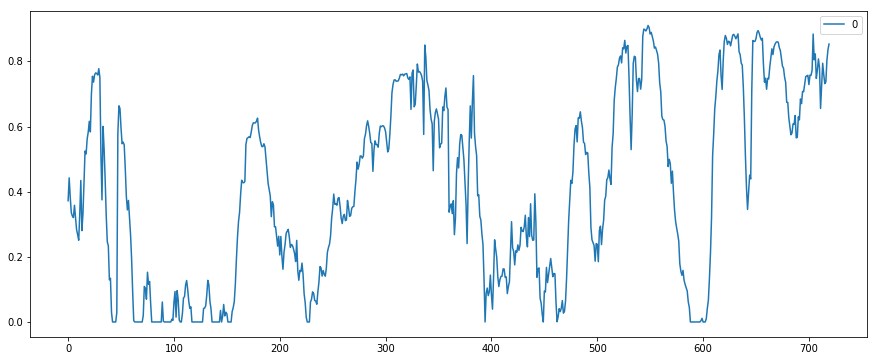

In [120]:
pd.DataFrame(y_pred).plot(figsize=(15,6))